# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 3:**

*   "Unidades 5 y 6"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 5 y 6 en un problema real asociado a la determinación del color de los granos de café mediante la medición de atributos característicos.

## Actividades

1. Descargar el conjunto de CoffeeRatings.csv1, para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

2. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

3. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

4. Realizar la predicción del atributo Color utilizando Random Forest analizando los parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

# Configuraciones iniciales

## Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DataFrame

In [ ]:
# Path 1 - Referenciado a la carpeta de Drive
data = pd.read_csv('/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP3/CoffeeRatings.csv', sep=';', engine='python')
# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('CoffeeRatings.csv', sep=';', engine='python')

In [ ]:
data

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [ ]:
data.head(3)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green


# Análisis exploratorio y procesamiento

## Estadísticas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [ ]:
data.describe().round(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,623.73,615.58,611.68,617.12,610.33,611.28,191.76,157.64,8.23,6675.44
std,273.72,274.25,263.87,274.48,276.37,276.30,257.58,203.44,5.13,3007.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,717.00,708.00,683.00,717.00,708.00,692.00,100.00,100.00,1.00,7792.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,775.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8325.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


## Nombres de atributos

In [ ]:
# Renombrar las columnas sin la palabra "Scores_"
new_names = {col: col.replace('Scores_', '') for col in data.columns}
data.rename(columns=new_names, inplace=True)

## Análisis de datos nulos o faltantes

In [ ]:
data.isna().sum()

Aroma         0
Flavor        0
Aftertaste    0
Acidity       0
Body          0
Balance       0
Uniformity    0
Sweetness     0
Moisture      0
Total         0
Color         0
dtype: int64

Se observa que no existen valores nulos pero hay registros con ausencia de datos (ceros). Se descartan para el análisis

In [ ]:
# Filtrar registros con algún valor igual a cero
data_with_zeros = data.loc[(data == 0).any(axis=1)]
data_with_zeros

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
10,733,758,717,758,742,758,100,100,0,8242,Green
11,733,742,733,733,75,767,100,100,0,8175,Green
22,783,808,775,808,792,775,100,100,0,8533,Green
23,80,792,792,808,783,775,100,100,0,8533,Green
26,775,783,775,808,80,775,100,100,0,850,Green
...,...,...,...,...,...,...,...,...,...,...,...
774,767,733,717,667,717,742,933,667,0,7683,Green
777,775,758,733,758,508,783,100,775,0,7875,Blue-Green
778,75,767,775,775,517,525,100,842,0,7808,Blue-Green
780,767,767,783,758,783,783,100,100,0,8442,Blue-Green


In [ ]:
# Eliminar registros que contienen al menos un cero en alguna característica
data_without_zeros = data[(data != 0).all(axis=1)]
data_without_zeros

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
829,733,742,733,742,75,742,867,933,1,7917,Green
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [ ]:
data2 = data_without_zeros

In [ ]:
data2.reset_index(drop=True, inplace=True)

In [ ]:
data2

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
717,733,742,733,742,75,742,867,933,1,7917,Green
718,758,70,675,692,70,692,100,100,11,7917,Green
719,758,767,742,742,767,767,867,867,1,7908,Green
720,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [ ]:
data2.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00
mean,620.10,610.48,613.32,613.18,611.44,608.15,189.26,146.71,9.50,6731.85
std,275.75,277.20,260.67,276.73,274.94,277.28,255.14,185.75,4.28,2963.55
min,65.00,65.00,65.00,65.00,65.00,65.00,60.00,60.00,1.00,710.00
25%,717.00,692.00,683.00,708.00,708.00,692.00,100.00,100.00,11.00,7833.00
50%,758.00,742.00,733.00,742.00,742.00,742.00,100.00,100.00,11.00,8183.00
75%,767.00,767.00,758.00,767.00,767.00,767.00,100.00,100.00,12.00,8323.00
max,875.00,883.00,867.00,875.00,842.00,858.00,933.00,933.00,17.00,9058.00


## Datos duplicados

In [ ]:
duplicatedRows = data2[data.duplicated()]
duplicatedRows.count()

Aroma         0
Flavor        0
Aftertaste    0
Acidity       0
Body          0
Balance       0
Uniformity    0
Sweetness     0
Moisture      0
Total         0
Color         0
dtype: int64

Se observa que no existen registros duplicados.

## Balance de datos en "Color"

In [ ]:
data2['Color'].value_counts()

Green           598
Bluish-Green     81
Blue-Green       43
Name: Color, dtype: int64

Este desbalance puede afectar el rendimiento de los modelos y producir un sesgo hacia la clase dominante. Se aplicará posteriormente la técnica SMOTE para resolverlo. Ver sección correspondiente al balance.

# Visualizaciones

## Cantidad de registros por tipo

In [ ]:
data2['Color'].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

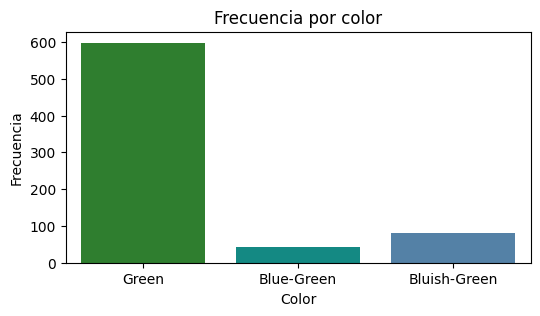

In [ ]:
colores = {'Green': '#228B22', 'Blue-Green': '#009D94', 'Bluish-Green': '#4682b4'}
plt.figure(figsize=(6, 3))
sns.countplot(x='Color', data=data2, palette=colores)
plt.title('Frecuencia por color')
plt.xlabel('Color'), plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='center')
plt.show()

## Histogramas

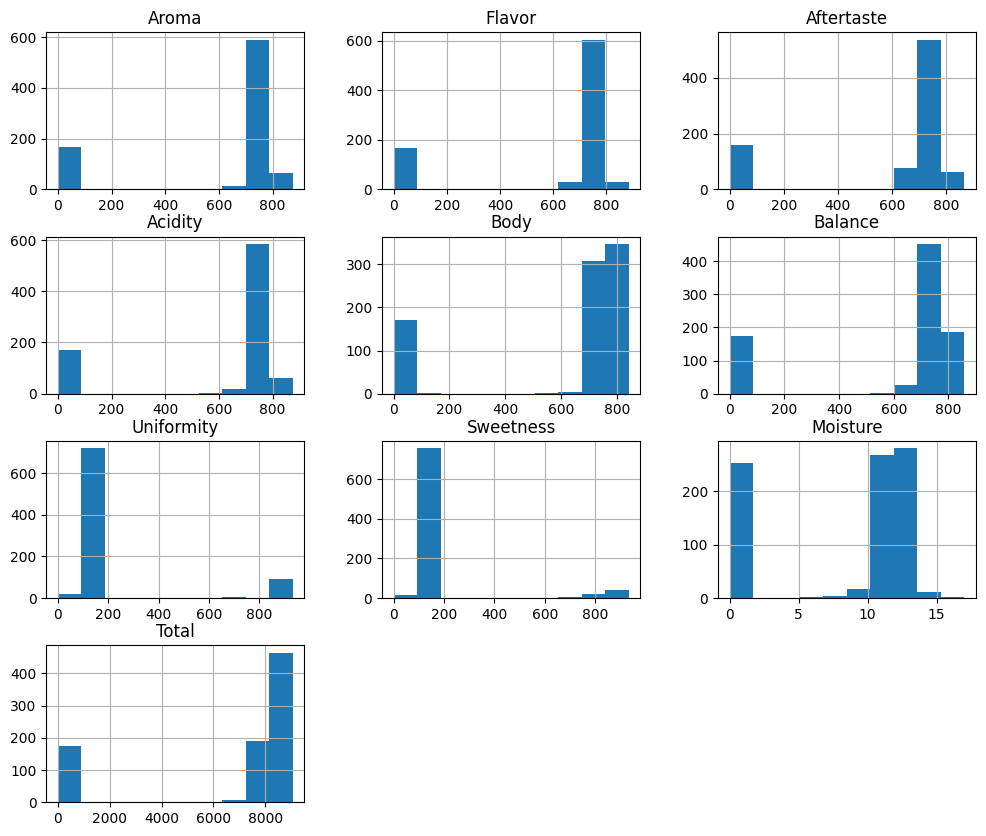

In [ ]:
data.hist(figsize=(12,10))
plt.show()

## Boxplots

### Boxplots de atributos por color

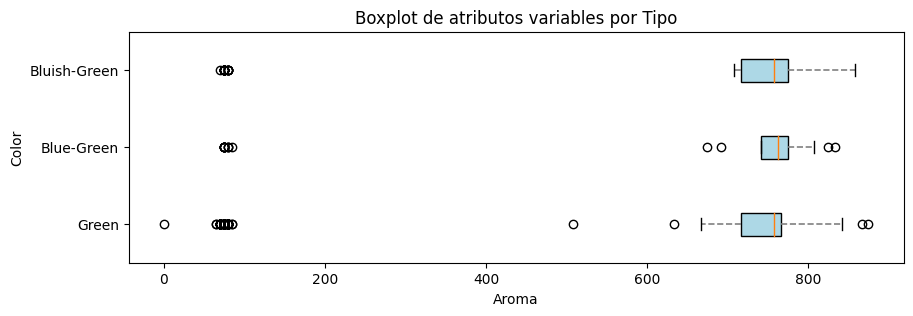

In [ ]:
# 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
# 'Uniformity', 'Sweetness', 'Moisture', 'Total', 'Color'
target = 'Aroma'

plt.figure(figsize=(10, 3))
boxplot = plt.boxplot([data[data['Color'] == label][target] for label in data['Color'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de las cajas (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(data['Color'].unique()) + 1), data['Color'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Color')
plt.title('Boxplot de atributos variables por Tipo')
plt.show()

### Boxplots por categorías

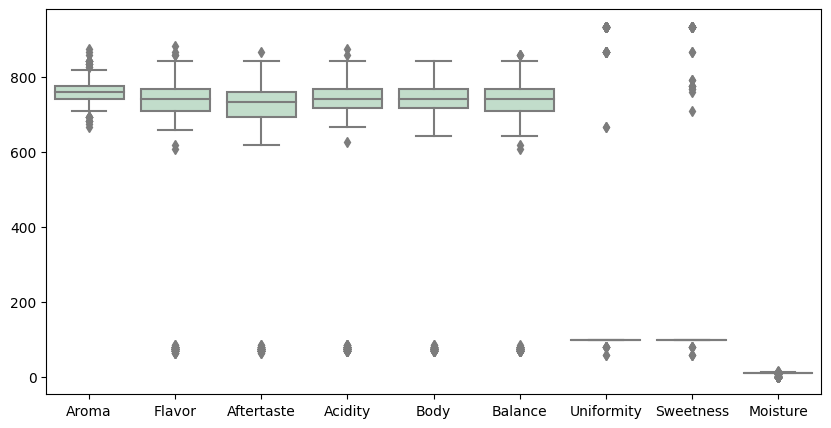

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data2.drop('Total', axis = 1), color='#BDE2C9')
plt.xticks(rotation=0)
plt.show()

### Eliminación de Outliers

In [ ]:
data2 = data2[(data2['Aroma']<900)&(data2['Aroma']>650)]
# data2 = data2[(data2['Flavor']<0.90)&(data2['Flavor']>0.2)]
# data2 = data2[(data2['Aftertaste']<0.90)&(data2['Aftertaste']>0.0)]
# df_std = df_std[(df_std['Defense']<2.4)]
# df_std = df_std[(df_std['Sp. Atk']<2.4)]
# df_std = df_std[(df_std['Sp. Def']<2.4)]
# df_std = df_std[(df_std['Speed']<3.0)]

## Matriz de correlación

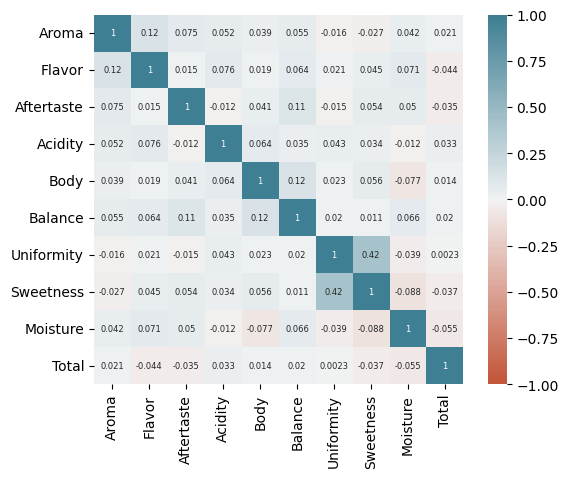

In [ ]:
corr = data2.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

## Boxplots estandarizados y filtrados

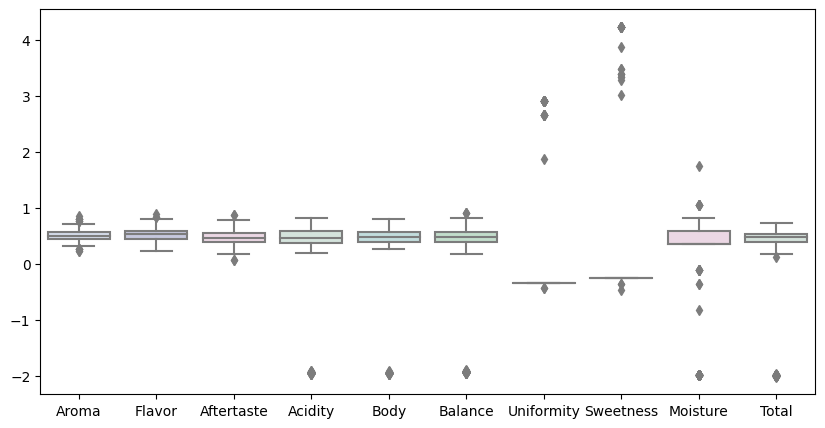

In [ ]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2", "#BDE2C9"]
plt.figure(figsize=(10,5))
sns.boxplot(data = df_std, palette = colours)
plt.xticks(rotation=0)
plt.show()

# Estandarización

In [ ]:
df = data2.copy()

## Estandarización Z-score (Excluyendo variable categórica)

In [ ]:
df_sub = df.drop('Color', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sub)
# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
# Mantenemos las columnas excluídas del estandarizado
df_std['Color'] = df['Color']

In [ ]:
df_std.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.01,-1.97,-2.10,-1.98,-1.99,-1.96,-0.51,-0.47,-1.99,-2.03
25%,0.35,0.29,0.27,0.34,0.35,0.30,-0.35,-0.25,0.35,0.37
50%,0.50,0.47,0.46,0.47,0.48,0.48,-0.35,-0.25,0.35,0.49
75%,0.53,0.57,0.56,0.56,0.57,0.57,-0.35,-0.25,0.58,0.54
max,0.93,0.98,0.97,0.95,0.84,0.90,2.92,4.24,1.75,0.79


## Estandarización Min-Max (Excluyendo variable categórica)

In [ ]:
df_sub = df.drop('Color', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_sub)
# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std2 = pd.DataFrame(X_scaled, columns=df_sub.columns)
# Mantenemos las columnas excluídas del estandarizado
df_std2['Color'] = df['Color']

In [ ]:
df_std2.describe().round(2)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total
count,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00,722.00
mean,0.69,0.67,0.68,0.68,0.70,0.68,0.15,0.10,0.53,0.72
std,0.34,0.34,0.33,0.34,0.35,0.35,0.29,0.21,0.27,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.80,0.77,0.77,0.79,0.83,0.79,0.05,0.05,0.62,0.85
50%,0.86,0.83,0.83,0.84,0.87,0.85,0.05,0.05,0.62,0.90
75%,0.87,0.86,0.86,0.87,0.90,0.89,0.05,0.05,0.69,0.91
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Codificación de la variable "Color"

In [ ]:
data_encoded = pd.get_dummies(data2, columns=['Color'], drop_first=False)

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 834
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Aroma               722 non-null    int64
 1   Flavor              722 non-null    int64
 2   Aftertaste          722 non-null    int64
 3   Acidity             722 non-null    int64
 4   Body                722 non-null    int64
 5   Balance             722 non-null    int64
 6   Uniformity          722 non-null    int64
 7   Sweetness           722 non-null    int64
 8   Moisture            722 non-null    int64
 9   Total               722 non-null    int64
 10  Color_Blue-Green    722 non-null    uint8
 11  Color_Bluish-Green  722 non-null    uint8
 12  Color_Green         722 non-null    uint8
dtypes: int64(10), uint8(3)
memory usage: 64.2 KB


# Separación de conjuntos de Entrenamiento y Prueba

# Balance de datos - SMOTE

(Synthetic Minority Over-sampling Technique). SMOTE crea instancias sintéticas de las clases minoritarias mediante la interpolación de ejemplos existentes.

Esta sección se agrega, a modo experimental, al evaluar las métricas del modelo de clasificación, intentando mejorar los resultados con esta estrategia.

## Separación de conjuntos X e y

In [ ]:
# Separación de variables explicativas y variables objetivo
X = df_std.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1).copy()
y = df_std[['RainfallTomorrow', 'RainTomorrow']].copy()

In [ ]:
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## DataFrame de Entrenamiento y Prueba

In [ ]:
# Crear un nuevo DataFrame para TRAIN y para TEST
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['RainTomorrow'] = y['RainTomorrow']
df_train['RainfallTomorrow'] = y['RainfallTomorrow']

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['RainTomorrow'] = y['RainTomorrow']
df_test['RainfallTomorrow'] = y['RainfallTomorrow']

## SMOTE en Entrenamiento

In [ ]:
X_smote = df_train.drop('RainTomorrow', axis=1)
y_smote = df_train['RainTomorrow']

In [ ]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_smote, y_smote)

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

In [ ]:
# Crear un nuevo DataFrame con los datos resampleados
df_smote = pd.DataFrame(X_train_resampled, columns=X_smote.columns)
# Añadir la columna 'RainTomorrow' al DataFrame resampleado
df_smote['RainTomorrow'] = y_train_resampled

In [ ]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   HP       5120 non-null   float64 
 1   Attack   5120 non-null   float64 
 2   Defense  5120 non-null   float64 
 3   Sp. Atk  5120 non-null   float64 
 4   Sp. Def  5120 non-null   float64 
 5   Speed    5120 non-null   float64 
 6   Type     5120 non-null   category
dtypes: category(1), float64(6)
memory usage: 245.8 KB


In [ ]:
df_smote["Type"].value_counts()

Water       332
Normal      313
Bug         304
Grass       304
Rock        293
Electric    292
Fire        291
Ghost       285
Psychic     284
Dark        277
Poison      277
Ice         274
Fighting    273
Ground      271
Dragon      270
Fairy       267
Steel       267
Flying      246
Name: Type, dtype: int64

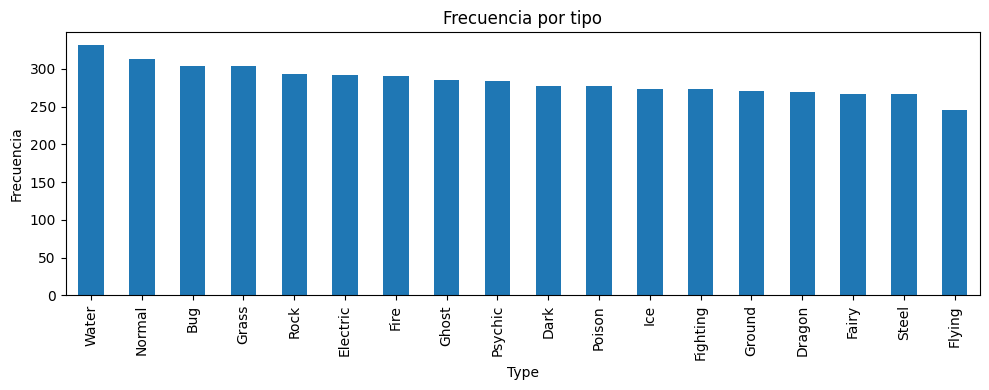

In [ ]:
#@title Cantidad de registros por tipo

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
df_smote['Type'].value_counts().plot(kind='bar')
plt.title('Frecuencia por tipo')
plt.xlabel('Type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
cols= ["salmon","lightgreen"]
plt.figure(figsize=(2, 3))
sns.countplot(x=df_smote['RainTomorrow'], palette= cols)
print(df_smote['RainTomorrow'].value_counts())
plt.show()

# SVM- Kernel lineal

In [ ]:
df = data2

In [ ]:
df = data_encoded

## Preparación de los conjuntos

In [ ]:
# Datos estandarizados
X = df.drop(['Color'], axis=1)
y = df[['Color']]

In [ ]:
# Datos estandarizados
X = df.drop(['Color_Blue-Green', 'Color_Bluish-Green', 'Color_Green'], axis=1)
y = df[['Color_Blue-Green', 'Color_Bluish-Green', 'Color_Green']]

In [ ]:
# Datos Balanceados - SMOTE
X = df_smote.drop(['Type'], axis=1)
y = df_smote['Type']

### Conjuntos de Entrenamiento - Prueba

In [ ]:
# División inicial en conjunto de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# División inicial en conjunto de entrenamiento y prueba (70-30) -- Datos Balanceados - SMOTE
# df_train, df_test  = train_test_split(df_smote, test_size=0.3, random_state=123)

## Aplicación de la técnica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Parámetro C: 0.1
Validación Cruzada (Precisión): 0.2495049504950495
Conjunto de Prueba (Precisión): 0.7768796969981959
Conjunto de Prueba (Exhaustividad): 0.2857142857142857
Conjunto de Prueba (Exactitud): 0.2857142857142857
Conjunto de Prueba (F1-Score): 0.33324566702342234

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.09      0.58      0.16        12
Bluish-Green       0.15      0.60      0.24        25
       Green       0.91      0.22      0.36       180

    accuracy                           0.29       217
   macro avg       0.39      0.47      0.25       217
weighted avg       0.78      0.29      0.33       217



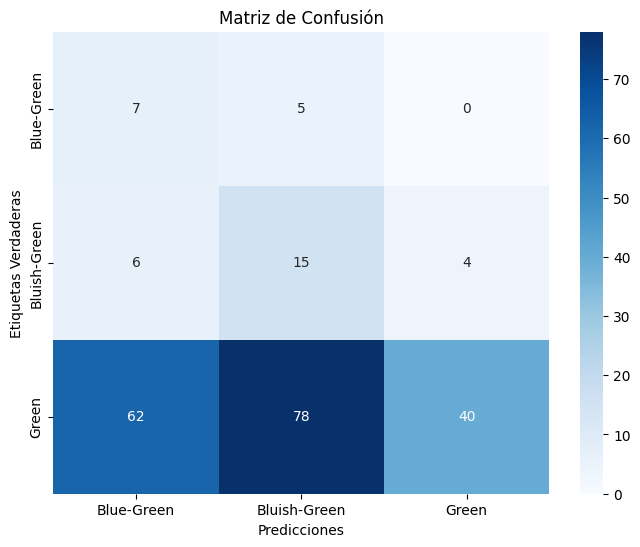

------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Parámetro C: 1
Validación Cruzada (Precisión): 0.23366336633663365
Conjunto de Prueba (Precisión): 0.7149915142956246
Conjunto de Prueba (Exhaustividad): 0.2073732718894009
Conjunto de Prueba (Exactitud): 0.2073732718894009
Conjunto de Prueba (F1-Score): 0.23568596822943935

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.07      0.50      0.12        12
Bluish-Green       0.14      0.52      0.21        25
       Green       0.84      0.14      0.25       180

    accuracy                           0.21       217
   macro avg       0.35      0.39      0.19       217
weighted avg       0.71      0.21      0.24       217



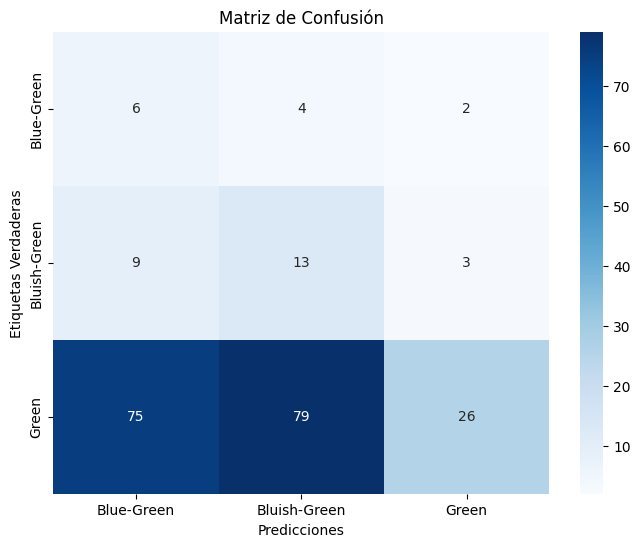

------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Parámetro C: 10
Validación Cruzada (Precisión): 0.21782178217821785
Conjunto de Prueba (Precisión): 0.7660851693109758
Conjunto de Prueba (Exhaustividad): 0.25806451612903225
Conjunto de Prueba (Exactitud): 0.25806451612903225
Conjunto de Prueba (F1-Score): 0.30002958750408265

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.09      0.67      0.16        12
Bluish-Green       0.14      0.52      0.23        25
       Green       0.90      0.19      0.32       180

    accuracy                           0.26       217
   macro avg       0.38      0.46      0.24       217
weighted avg       0.77      0.26      0.30       217



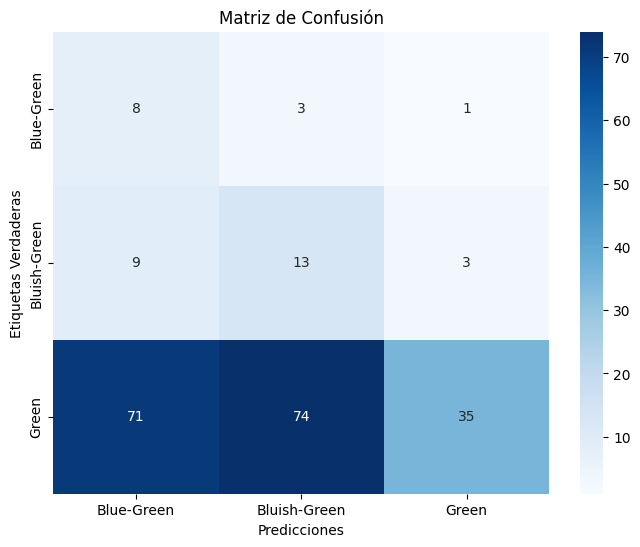

------


In [ ]:
# Lista de valores para el parámetro de costo (C) que deseas probar
# parametros_c = [0.1, 1, 10, 100, 1000]
parametros_c = [0.1, 1, 10]

# Realizar la validación cruzada para cada valor de C
for c in parametros_c:
    # Crear un clasificador SVM con kernel lineal y el valor de C actual
    svm_clf = SVC(kernel='linear', C=c, class_weight='balanced', random_state=42)

    # Realizar la validación cruzada con k=5
    scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')

    # Entrenar el modelo en el conjunto de entrenamiento completo
    svm_clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = svm_clf.predict(X_test)

    # Calcular métricas en el conjunto de prueba
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Mostrar resultados
    print(f"Parámetro C: {c}")
    print(f"Validación Cruzada (Precisión): {scores.mean()}")
    print(f"Conjunto de Prueba (Precisión): {precision}")
    print(f"Conjunto de Prueba (Exhaustividad): {recall}")
    print(f"Conjunto de Prueba (Exactitud): {accuracy}")
    print(f"Conjunto de Prueba (F1-Score): {f1}")

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

    print("------")

In [ ]:
#@title Modelo
clf = tree.DecisionTreeClassifier()

# Hperparámetros obtenidos del optimizador
# 'random_state': 123, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 8
# clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=123)

In [ ]:
#@title Entrenamiento
# Entreno el modelo pasando las características de entrenamiento (train_features) y las etiquetas de entrenamiento correspondientes (train_labels).
decision_tree = clf.fit(train_features, train_labels)

# Predicción en el conjunto de entrenamiento
clf_predictions_train = clf.predict(train_features)

# Predicción en el conjunto de prueba
clf_predictions = clf.predict(test_features)

In [ ]:
#@title Evaluación del modelo
# Evaluar el rendimiento en el conjunto de entrenamiento
train_accuracy = accuracy_score(train_labels, clf_predictions_train)

# Evaluar el rendimiento en el conjunto de validación
val_predictions = clf.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_predictions)

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(test_labels, clf_predictions)

# Métricas de precisión
train_precision = precision_score(train_labels, clf_predictions_train, average='macro')
val_precision = precision_score(val_labels, val_predictions, average='macro')
test_precision = precision_score(test_labels, clf_predictions, average='macro')

# Métricas de recall
train_recall = recall_score(train_labels, clf_predictions_train, average='macro')
val_recall = recall_score(val_labels, val_predictions, average='macro')
test_recall = recall_score(test_labels, clf_predictions, average='macro')

# Métricas de F1-score
train_f1 = f1_score(train_labels, clf_predictions_train, average='macro')
val_f1 = f1_score(val_labels, val_predictions, average='macro')
test_f1 = f1_score(test_labels, clf_predictions, average='macro')

# Imprimir las métricas
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("Train Accuracy: ", train_accuracy, "\nValidation Accuracy: ", val_accuracy, "\nTest Accuracy: ", test_accuracy)
print("\nTrain Precision: ", train_precision, "\nValidation Precision: ", val_precision, "\nTest Precision: ", test_precision)
print("\nTrain Recall: ", train_recall, "\nValidation Recall: ", val_recall, "\nTest Recall: ", test_recall)
print("\nTrain F1-score: ", train_f1, "\nValidation F1-score: ", val_f1, "\nTest F1-score: ", test_f1)

Train Accuracy:  0.9743935309973046 
Validation Accuracy:  0.09433962264150944 
Test Accuracy:  0.11949685534591195

Train Precision:  0.9766311293578097 
Validation Precision:  0.0660245618578952 
Test Precision:  0.10248608603871762

Train Recall:  0.9807559410167099 
Validation Recall:  0.07647183561162056 
Test Recall:  0.11968677927011259

Train F1-score:  0.9781524614388213 
Validation F1-score:  0.06868650366529554 
Test F1-score:  0.10250027750027751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**OBSERVACIÓN:** Si un modelo tiene un rendimiento excelente en el conjunto de entrenamiento pero un rendimiento significativamente inferior en el conjunto de prueba, es probable que esté sobreajustando (overfitting) los datos de entrenamiento.

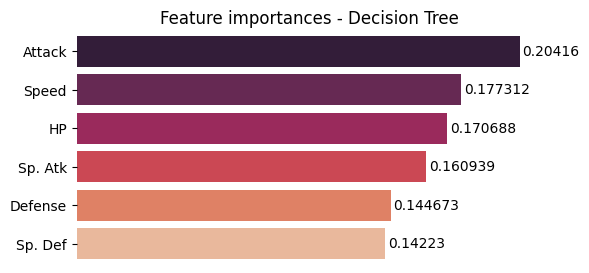

In [ ]:
#@title Importancia de las características

# Características y sus importancias -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': decision_tree.feature_importances_ })
# Ordenamiento por importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
plt.figure(figsize=(6,3))
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

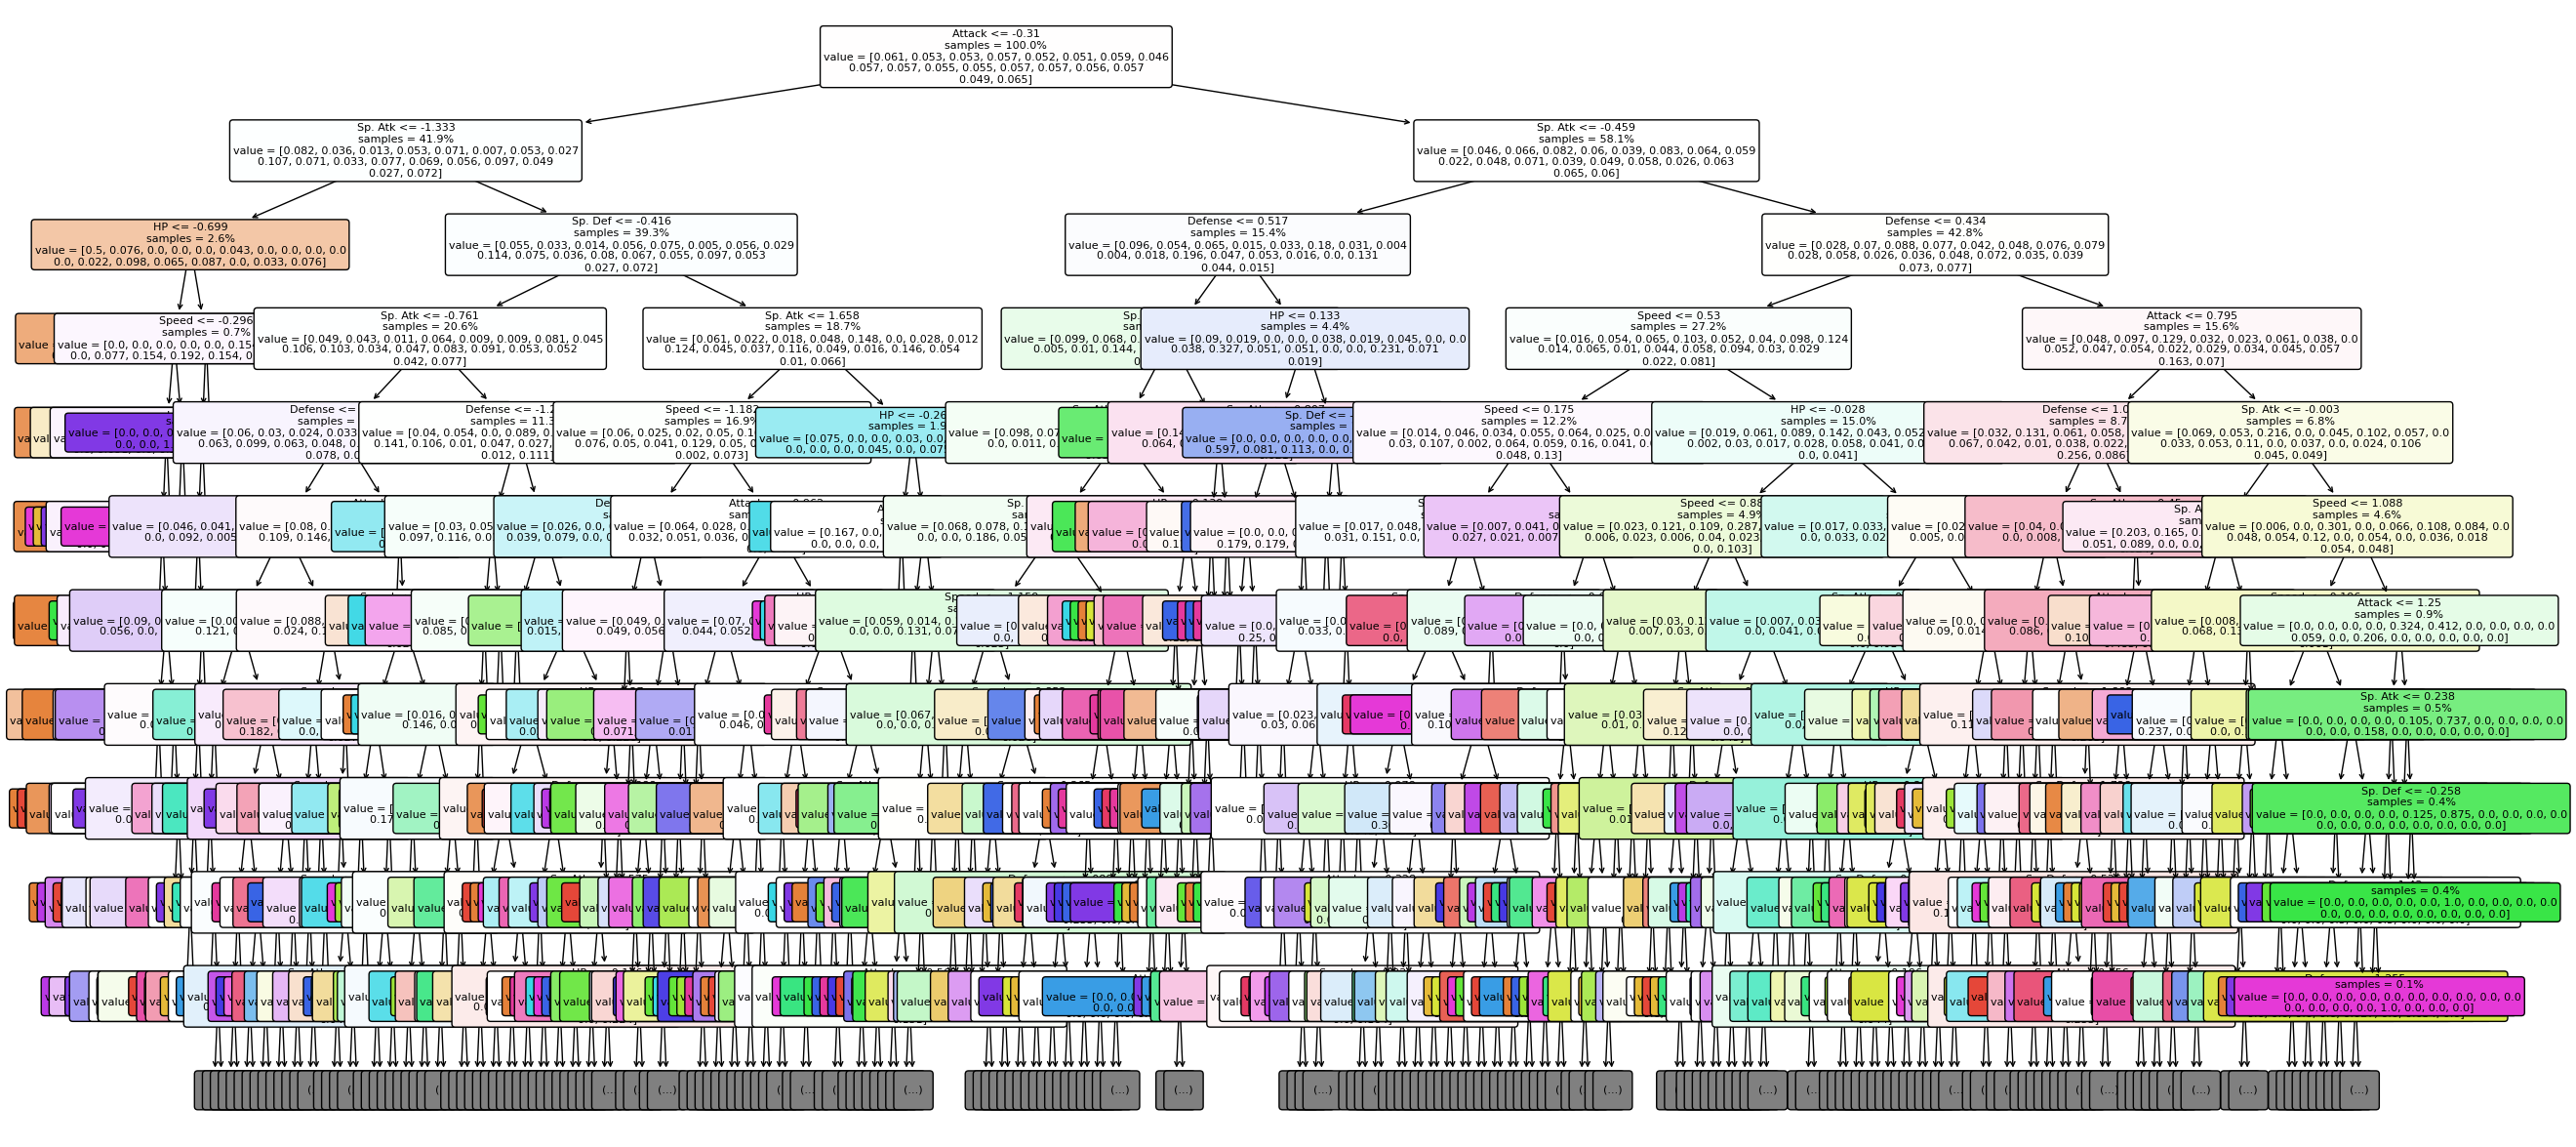

In [ ]:
#@title Árbol de Decisión
features = feature_list

plt.figure(figsize=(30,15))
tree.plot_tree(decision_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True,
                proportion=True,  # Proporción de la muestra en cada nodo
                impurity=False,   # No mostrar medida de impureza en cada nodo
                max_depth=10  # Limita la profundidad del árbol - None o entero
                )
plt.show()

## Optimización de Hiperparámetros

In [ ]:
#@title Random Search
param_grid = {
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # El número máximo de características a considerar para cada división. Suele ser la raíz cuadrada del número de características.
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20],  # La profundidad máxima del árbol.
    'min_samples_split': [2, 3, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras requeridas en una hoja
    'random_state': [123]
}
random_search = RandomizedSearchCV(clf, param_grid, cv=5)
random_search.fit(train_features, train_labels)
first_best_params = random_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria
best_prediction = random_search.predict(test_features) #Entrenamos el modelo con estos hiperparametros

test_accuracy = accuracy_score(test_labels, best_prediction)

print(f'Mejores hiperparámetros:{first_best_params} \nTest Accuracy {test_accuracy}')

Mejores hiperparámetros:{'random_state': 123, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 6} 
Test Accuracy 0.13836477987421383


In [ ]:
#@title Grid Search
param_grid = {
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # El número máximo de características a considerar para cada división. Suele ser la raíz cuadrada del número de características.
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20],  # La profundidad máxima del árbol.
    'min_samples_split': [2, 3, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras requeridas en una hoja
    'random_state': [123]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_features, train_labels)
best_params = grid_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria
best_prediction = grid_search.predict(test_features) #Entrenamos el modelo con estos hiperparametros

test_accuracy = accuracy_score(test_labels, best_prediction)

print(f'Mejores hiperparámetros:{best_params} \nTest Accuracy {test_accuracy}')

Mejores hiperparámetros:{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 123} 
Test Accuracy 0.15723270440251572


## Métricas del modelo (Test)

In [ ]:
accuracy = accuracy_score(test_labels, clf_predictions)
precision = precision_score(test_labels, clf_predictions, average='macro')
recall = recall_score(test_labels, clf_predictions, average='macro')
f1 = f1_score(test_labels, clf_predictions, average='macro')

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1 {f1}')

Accuracy: 0.11949685534591195 
Precision: 0.10248608603871762 
Recall: 0.11968677927011259 
F1 0.10250027750027751


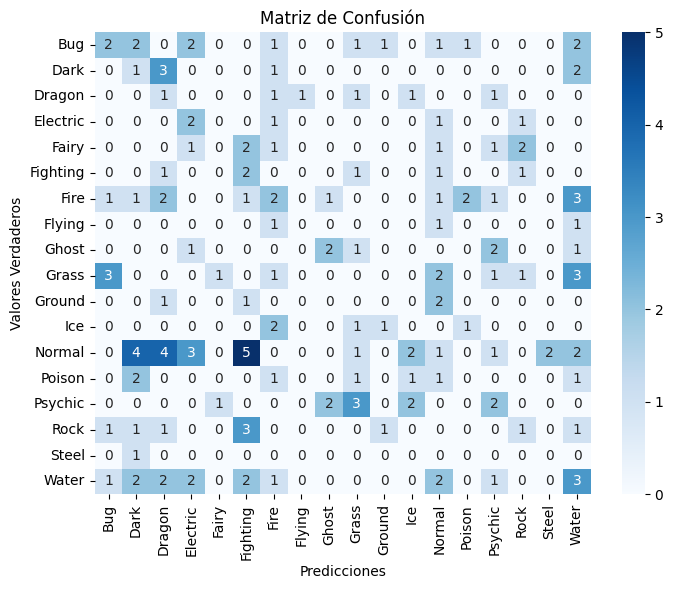



Informe de Clasificación:
--- Predicc. en Test ---
               precision    recall  f1-score   support

         Bug       0.25      0.15      0.19        13
        Dark       0.07      0.14      0.10         7
      Dragon       0.07      0.17      0.10         6
    Electric       0.18      0.40      0.25         5
       Fairy       0.00      0.00      0.00         8
    Fighting       0.12      0.33      0.18         6
        Fire       0.15      0.13      0.14        15
      Flying       0.00      0.00      0.00         3
       Ghost       0.40      0.29      0.33         7
       Grass       0.00      0.00      0.00        12
      Ground       0.00      0.00      0.00         4
         Ice       0.00      0.00      0.00         5
      Normal       0.07      0.04      0.05        25
      Poison       0.00      0.00      0.00         7
     Psychic       0.20      0.20      0.20        10
        Rock       0.17      0.11      0.13         9
       Steel       0.00    

In [ ]:
# Obtener la matriz de confusión
# conf_matrix = confusion_matrix(test_labels, best_prediction)
conf_matrix = confusion_matrix(test_labels, clf_predictions)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Imprimir un informe de clasificación detallado
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("\n\nInforme de Clasificación:")
print("--- Predicc. en Test ---\n", classification_report(test_labels, clf_predictions))
print("--- Mejor Predicc. ---\n", classification_report(test_labels, best_prediction))

## Predicciones

In [ ]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': test_labels, 'Predicc.': clf_predictions})
classification_table.sample(15)

,Actual,Predicc.
76,Normal,Fighting
123,Ghost,Psychic
113,Rock,Ground
38,Bug,Dark
33,Normal,Fighting
128,Fire,Ghost
142,Grass,Normal
157,Dark,Water
18,Fire,Water
88,Psychic,Grass


# SVM - Kernel gaussiano

Vamos a probar **GaussianNB** en primer lugar, porque no requiere discretizar los datos y puede manejar características continuas como las obtenidas luego de estandarizar.

Luego probamos con **MultinomialNB**, por lo que será necesario discretizar los datos. Para ello nos valdremos de KBinsDiscretizer y experimentaremos con los valores de "n_bins".

## Preparación de los conjuntos

In [ ]:
# Datos estandarizados
X = df_std.drop(['Type'], axis=1)
y = df_std['Type']

In [ ]:
# Datos Balanceados - SMOTE
X = df_smote.drop(['Type'], axis=1)
y = df_smote['Type']

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelo GaussianNB

In [ ]:
# Clasificador Naive Bayes Gaussian
clf_gNB = GaussianNB()

# Entrenar el modelo
clf_gNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = clf_gNB.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)

## Métricas del modelo (Test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1 {f1}')

Accuracy: 0.11635220125786164 
Precision: 0.07120079126036513 
Recall: 0.09661287104457346 
F1 0.06991594282128838


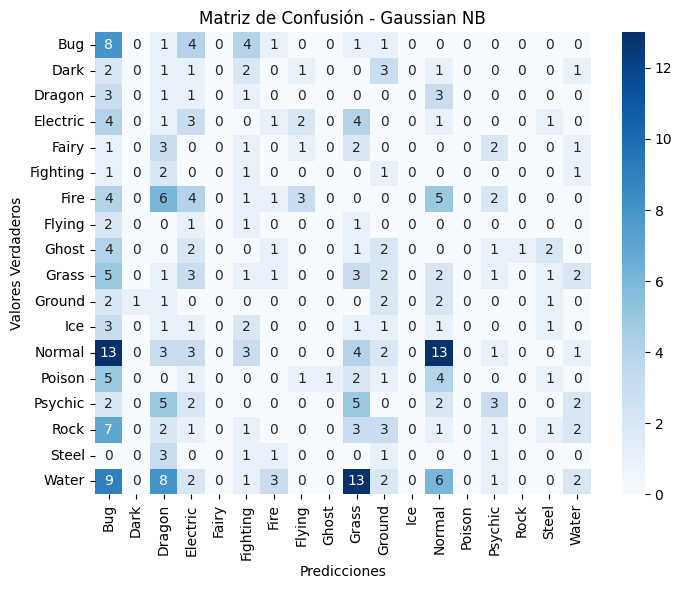



Informe de Clasificación:
--- Predic. en Test ---
               precision    recall  f1-score   support

         Bug       0.11      0.40      0.17        20
        Dark       0.00      0.00      0.00        12
      Dragon       0.03      0.11      0.04         9
    Electric       0.10      0.18      0.13        17
       Fairy       0.00      0.00      0.00        11
    Fighting       0.05      0.17      0.08         6
        Fire       0.11      0.04      0.06        26
      Flying       0.00      0.00      0.00         5
       Ghost       0.00      0.00      0.00        14
       Grass       0.07      0.14      0.10        22
      Ground       0.10      0.22      0.13         9
         Ice       0.00      0.00      0.00        11
      Normal       0.32      0.30      0.31        43
      Poison       0.00      0.00      0.00        16
     Psychic       0.23      0.14      0.18        21
        Rock       0.00      0.00      0.00        22
       Steel       0.00     

In [ ]:
#@title Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = clf_gNB.classes_, yticklabels = clf_gNB.classes_)
plt.title('Matriz de Confusión - Gaussian NB')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Imprimir un informe de clasificación detallado
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("\n\nInforme de Clasificación:")
print("--- Predic. en Test ---\n", classification_report(y_test, y_pred))

## Modelo MultinomialNB

In [ ]:
# Discretizar las características con KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_discrete = discretizer.fit_transform(X_train)
X_test_discrete = discretizer.transform(X_test)

In [ ]:
# Clasificador Naive Bayes Multinomial
clf_mNB = MultinomialNB()

# Entrenar el modelo
clf_mNB.fit(X_train_discrete, y_train)

MultinomialNB()

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = clf_mNB.predict(X_test_discrete)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)

## Métricas del modelo (Test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1 {f1}')

Accuracy: 0.18867924528301888 
Precision: 0.1485806343491353 
Recall: 0.09588837210889 
F1 0.07481668654662278


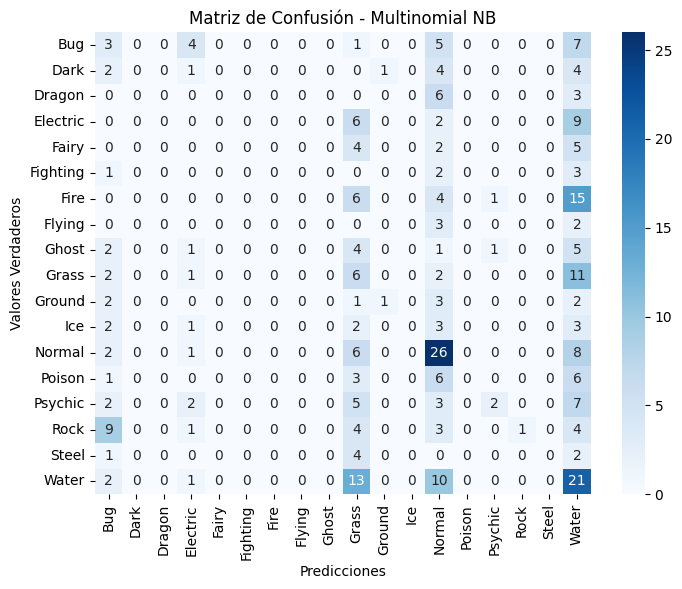



Informe de Clasificación:
--- Predicc. en Test ---
               precision    recall  f1-score   support

         Bug       0.10      0.15      0.12        20
        Dark       0.00      0.00      0.00        12
      Dragon       0.00      0.00      0.00         9
    Electric       0.00      0.00      0.00        17
       Fairy       0.00      0.00      0.00        11
    Fighting       0.00      0.00      0.00         6
        Fire       0.00      0.00      0.00        26
      Flying       0.00      0.00      0.00         5
       Ghost       0.00      0.00      0.00        14
       Grass       0.09      0.27      0.14        22
      Ground       0.50      0.11      0.18         9
         Ice       0.00      0.00      0.00        11
      Normal       0.31      0.60      0.41        43
      Poison       0.00      0.00      0.00        16
     Psychic       0.50      0.10      0.16        21
        Rock       1.00      0.05      0.09        22
       Steel       0.00    

In [ ]:
#@title Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = clf_mNB.classes_, yticklabels = clf_mNB.classes_)
plt.title('Matriz de Confusión - Multinomial NB')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Imprimir un informe de clasificación detallado
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("\n\nInforme de Clasificación:")
print("--- Predicc. en Test ---\n", classification_report(y_test, y_pred))

## Predicciones

In [ ]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicc.': y_pred})
classification_table.sample(15)

,Actual,Predicc.
56,Grass,Grass
968,Dark,Water
298,Water,Grass
393,Psychic,Water
702,Bug,Electric
487,Electric,Water
336,Normal,Electric
537,Fighting,Water
1069,Bug,Normal
320,Normal,Water


# Random Forest

## Preparación de los conjuntos

In [ ]:
# Datos estandarizados
X = df.drop(['Color'], axis=1)
y = df[['Color']]

In [ ]:
# Datos Balanceados - SMOTE
X = df_smote.drop(['Type'], axis=1)
y = df_smote['Type']

In [ ]:
# División inicial en conjunto de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Aplicación de la técnica

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Mejor combinación de hiperparámetros: (50, 10)
Conjunto de Prueba (Precisión): 0.6860760584004479
Conjunto de Prueba (Exhaustividad): 0.815668202764977
Conjunto de Prueba (Exactitud): 0.815668202764977
Conjunto de Prueba (F1-Score): 0.7452805913588622

Reporte de Clasificación:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        25
       Green       0.83      0.98      0.90       180

    accuracy                           0.82       217
   macro avg       0.28      0.33      0.30       217
weighted avg       0.69      0.82      0.75       217



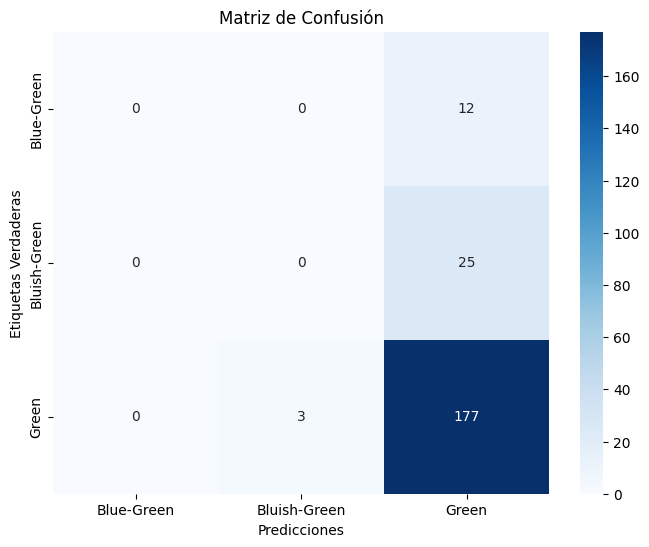

In [ ]:
# Lista de valores para la cantidad de estimadores (n_estimators) y la máxima profundidad de los árboles (max_depth)
valores_n_estimators = [10, 50, 100, 200]
valores_max_depth = [None, 10, 20, 30]

# Realizar la búsqueda de hiperparámetros
mejor_precision = 0
mejor_combinacion = None

for n_estimators in valores_n_estimators:
    for max_depth in valores_max_depth:
        # Crear un clasificador Random Forest con los parámetros actuales
        rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        # Realizar validación cruzada con k=5
        scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
        precision_media = scores.mean()

        # Actualizar si encontramos una combinación con mejor precisión
        if precision_media > mejor_precision:
            mejor_precision = precision_media
            mejor_combinacion = (n_estimators, max_depth)

# Entrenar el modelo con la mejor combinación encontrada
mejor_n_estimators, mejor_max_depth = mejor_combinacion
rf_clf_final = RandomForestClassifier(n_estimators=mejor_n_estimators, max_depth=mejor_max_depth, random_state=42)
rf_clf_final.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_clf_final.predict(X_test)

# Calcular métricas en el conjunto de prueba
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f"Mejor combinación de hiperparámetros: {mejor_combinacion}")
print(f"Conjunto de Prueba (Precisión): {precision}")
print(f"Conjunto de Prueba (Exhaustividad): {recall}")
print(f"Conjunto de Prueba (Exactitud): {accuracy}")
print(f"Conjunto de Prueba (F1-Score): {f1}")

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf_final.classes_, yticklabels=rf_clf_final.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

In [ ]:
# Inicializa el clasificador k-NN
cls_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Entrena el clasificador con el conjunto de entrenamiento
cls_knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = cls_knn.predict(X_test)

## Métricas del modelo (Test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1 {f1}')

Accuracy: 0.7779947916666666 
Precision: 0.7794661544359109 
Recall: 0.7823830752480716 
F1 0.775971928954442


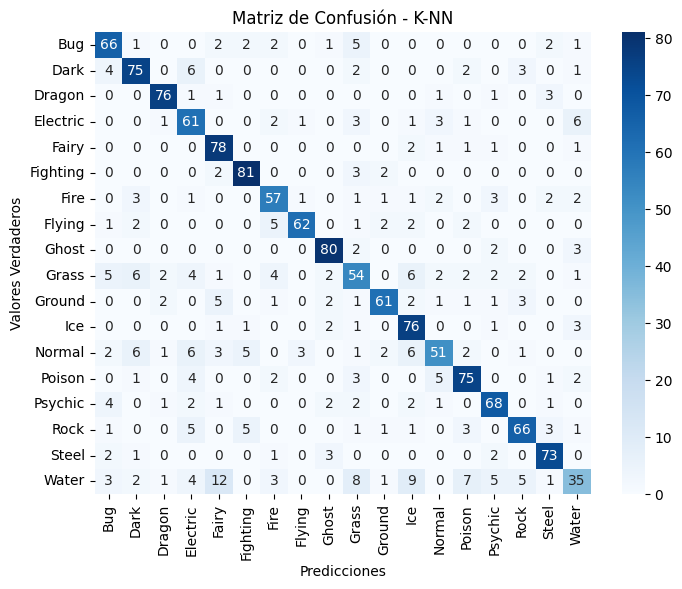



Informe de Clasificación:
--- Predicc. en Test ---
               precision    recall  f1-score   support

         Bug       0.75      0.80      0.78        82
        Dark       0.77      0.81      0.79        93
      Dragon       0.90      0.92      0.91        83
    Electric       0.65      0.77      0.71        79
       Fairy       0.74      0.93      0.82        84
    Fighting       0.86      0.92      0.89        88
        Fire       0.74      0.77      0.75        74
      Flying       0.93      0.81      0.86        77
       Ghost       0.87      0.92      0.89        87
       Grass       0.61      0.58      0.60        93
      Ground       0.87      0.76      0.81        80
         Ice       0.70      0.89      0.79        85
      Normal       0.76      0.57      0.65        89
      Poison       0.78      0.81      0.79        93
     Psychic       0.79      0.81      0.80        84
        Rock       0.82      0.76      0.79        87
       Steel       0.85    

In [ ]:
#@title Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = cls_knn.classes_, yticklabels = cls_knn.classes_)
plt.title('Matriz de Confusión - K-NN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Imprimir un informe de clasificación detallado
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("\n\nInforme de Clasificación:")
print("--- Predicc. en Test ---\n", classification_report(y_test, y_pred))

## Predicciones

In [ ]:
# Tabla de resultados para ver las predicciones
classification_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
classification_table.sample(15)

,Actual,Predicted
1858,Water,Water
485,Bug,Bug
952,Electric,Water
1773,Dark,Electric
4635,Flying,Flying
220,Grass,Grass
3740,Dark,Electric
1513,Electric,Electric
1485,Flying,Fire
3529,Ice,Ice


# Conclusiones y observaciones finales

En este análisis, implementamos diversos modelos de clasificación, incluyendo Árbol de Decisión, Bayes Ingenuo (con modelos Gaussianos y Multinomiales) y k-NN. Nuestro objetivo fue predecir la variable "Type" en un conjunto de datos estandarizado. A lo largo del proceso, nos enfocamos en la optimización de hiperparámetros para mejorar las métricas de rendimiento de cada modelo.

Uno de los hallazgos clave para mejorar las métricas fue la importancia de abordar el desbalanceo en las clases de la variable objetivo. Implementamos la técnica de sobremuestreo (oversampling) con SMOTE para generar datos sintéticos y lograr un equilibrio en las clases. Este enfoque fue especialmente efectivo al aplicarlo junto con el modelo k-NN, donde conseguimos mejoras significativas en las métricas de precisión, exhaustividad y exactitud. En efecto, si el proceso de oversampling se efectúa de manera iterativa más de una vez, al grado de efectividad en la predicción de la clase mejora notoriamente.